In [21]:
from PIL import Image

# adjust pixel of image to avoid out of bound [0,255]
def adjust_pixel(pixel):
    if pixel < 0: return 0
    elif pixel > 255: return 255
    return pixel

def changeBrightness():
    img = Image.open("lena.png") # import image
    pixels = img.load() # load pixel of image
    img_convert = Image.new(img.mode, img.size) # mode, size, color(default: 0)
    pixels_convert = img_convert.load() # load pixel of new image 
    for i in range(img_convert.size[0]):
        for j in range(img_convert.size[1]):
            R, G, B = pixels[i, j] # get R,G,B value
            # take R,G,B of old image plus for a value brightness and adjust new value to avoid out of bound
            # increase value 50 to get image with more brighter, this values usually in range [-255,255]
            _R, _G, _B = adjust_pixel(R + 50), adjust_pixel(G + 50), adjust_pixel(B + 50)
            pixels_convert[i, j] = (_R, _G, _B, 255) # update new pixel of image
    img_convert.save("lena_brighter.png") # save the output image

changeBrightness()

Text(0.5, 1.0, 'Original lena image')

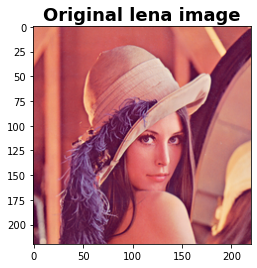

In [8]:
img1 = mpimg.imread("lena.png")
plt.imshow(img1)
plt.title("Original lena image", fontsize=18, fontweight='bold')

Text(0.5, 1.0, 'Lena image with more brighter')

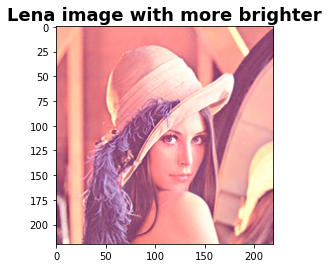

In [7]:
img2 = mpimg.imread("lena_brighter.png")
plt.imshow(img2)
plt.title("Lena image with more brighter", fontsize=18, fontweight='bold')

In [36]:
def changeContrast():
    img = Image.open("lena.png") # import image
    pixels = img.load() # load pixel of image
    img_convert = Image.new(img.mode, img.size) # mode, size, color(default: 0)
    pixels_convert = img_convert.load() # load pixel of new image 
    for i in range(img_convert.size[0]):
        for j in range(img_convert.size[1]):
            contrast_value = 100 # value to change contrast, it's usually in range [-255,255]
            # formula factor: F = (259(C + 255)) / (255(259 - C))
            factor = (259 * (contrast_value + 255)) / (255 * (259 - contrast_value))
            R, G, B = pixels[i, j] # get R,G,B value
            # formula adjust R,G,B: F(R - 128) + 128
            _R = adjust_pixel(factor * (R - 128) + 128)
            _G = adjust_pixel(factor * (G - 128) + 128)
            _B = adjust_pixel(factor * (B - 128) + 128)
            pixels_convert[i, j] = (int(_R), int(_G), int(_B), 255) # update new pixel of image, this must be int not float
    img_convert.save("lena_more_contrast.png") # save the output image
    
changeContrast()

Text(0.5, 1.0, 'Lena with more contrast')

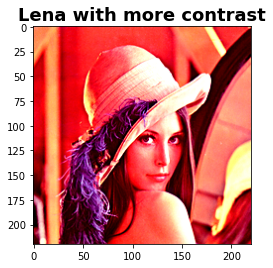

In [6]:
img3 = mpimg.imread("lena_more_contrast.png")
plt.imshow(img3)
plt.title("Lena with more contrast", fontsize=18, fontweight='bold')

In [38]:
def changeGrey():
    img = Image.open("lena.png") # import image
    pixels = img.load() # load pixel of image
    img_convert = Image.new(img.mode, img.size) # mode, size, color(default: 0)
    pixels_convert = img_convert.load() # load pixel of new image 
    for i in range(img_convert.size[0]):
        for j in range(img_convert.size[1]):
            R, G, B = pixels[i, j] # get R,G,B value
            # grey image: R,G,B have same value, so get average of 3 sub-pixels and create a new pixel
            # we also have another formula for better grayscale: x = (0.299*R + 0.587*G + 0.114*B)
            sub_pixel_avg = int(round((R + G + B) / 3))
            pixels_convert[i, j] = (sub_pixel_avg, sub_pixel_avg,sub_pixel_avg, 0) # update new pixel of image
    img_convert.save("lena_grey.png") # save the output image

changeGrey()

Text(0.5, 1.0, 'Lena grayscale')

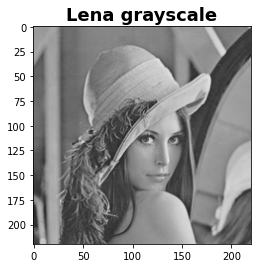

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img4 = mpimg.imread("lena_grey.png")
plt.imshow(img4)
plt.title("Lena grayscale", fontsize=18, fontweight='bold')

Text(0.5, 1.0, 'Mirror of lena')

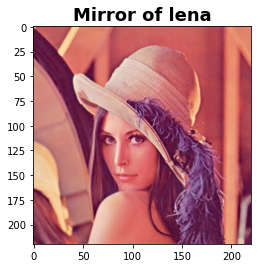

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img5 = mpimg.imread('lena.png') # import image
# example our matrix of image is: [[1,2,3], [4,5,6], [7,8,9]]
# fliplr will make matrix become: [[7,8,9], [4,5,6], [1,2,3]]
img6 = np.fliplr(img5) 
plt.imshow(img6)
plt.title("Mirror of lena", fontsize=18, fontweight='bold')

In [8]:
from PIL import Image

# import image and convert to RGBA to make sure image got an alpha channel
theme = Image.open("red_square.png").convert("RGBA")  
overlay = Image.open("yellow_star.png").convert("RGBA")
# blend the image
img13 = Image.blend(theme, overlay, 0.5) # alpha = 0.5
img13.save("flag_vn_blend.png", "PNG")

Text(0.5, 1.0, 'Red square')

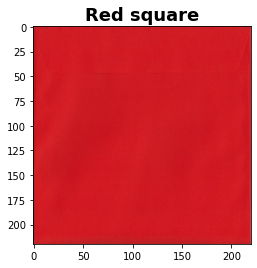

In [17]:
img15 = mpimg.imread("red_square.png")
plt.imshow(img15)
plt.title("Red square", fontsize=18, fontweight='bold')

Text(0.5, 1.0, 'Yellow star')

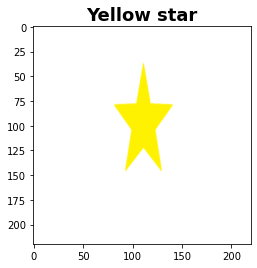

In [19]:
img16 = mpimg.imread("yellow_star.png")
plt.imshow(img16)
plt.title("Yellow star", fontsize=18, fontweight='bold')

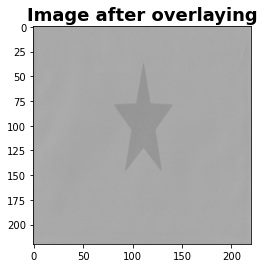

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def convertToGrayscale(rgb):
    # follow the formula: Y' = 0.2989*R + 0.5870*G + 0.1140*B 
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]) 

img14 = mpimg.imread('flag_vn_blend.png')     
grayscale = convertToGrayscale(img14)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.title("Image after overlaying", fontsize=18, fontweight='bold')
plt.show()

In [4]:
from PIL import Image, ImageDraw

img15 = Image.open("lena.png") # import image
pixels = img15.load() # load pixel of image

# box blur kernel 3x3: 1/9 * [[1,1,1],[1,1,1],[1,1,1]]
box_blur = [[1/9, 1/9, 1/9],
            [1/9, 1/9, 1/9],
            [1/9, 1/9, 1/9]]

centerKernel = len(box_blur) // 2 # get the center of kernel, centerKernel = 3//2 = 1
img16 = Image.new("RGB", img15.size) # output image

# calculate convolution
# for each pixel in image row (image row in input image), i = [1,218]
# img15.width = img15.height = 220 (default resolution of image)
for i in range(centerKernel, img15.width - centerKernel):
    # for each pixel in image column (image column in input image), j = [1,218]
    for j in range(centerKernel, img15.height - centerKernel):
        accumulator = [0, 0, 0] # set accumulator to zero
        # for each element in kernel row (kernel row in kernel), [0,0,0,1,1,1,2,2,2,...]
        for element1 in range(len(box_blur)):
            # for each element in kernel column (kernel column in kernel), [0,1,2,0,1,2,0,1,2,...]
            for element2 in range(len(box_blur)):
                if centerKernel < 0: centerKernel = 0 
                # if element position corresponding to pixel position
                pixel_position = pixels[i + element1 - centerKernel, j + element2 - centerKernel]
                # multiply element value corresponding to pixel value and add result to accumulator
                accumulator[0] += pixel_position[0] * box_blur[element1][element2]
                accumulator[1] += pixel_position[1] * box_blur[element1][element2]
                accumulator[2] += pixel_position[2] * box_blur[element1][element2]
        # set output image pixel to accumulator
        draw = ImageDraw.Draw(img16)
        draw.point((i, j), (int(accumulator[0]), int(accumulator[1]), int(accumulator[2])))
        
img16.save("lena_blur.png") # save the image

Text(0.5, 1.0, 'Lena blur')

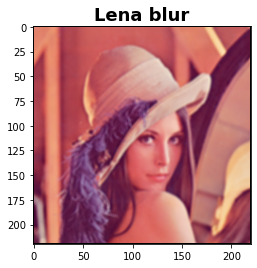

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img17 = mpimg.imread("lena_blur.png")
plt.imshow(img17)
plt.title("Lena blur", fontsize=18, fontweight='bold')